**O que é uma série temporal?**
===
Em estatística, econometria, matemática aplicada e processamento de sinais, uma série temporal é uma coleção de observações feitas sequencialmente ao longo do tempo.

**Objetivo Geral**
===
Neste projeto, iremos analisar diversas empresas fantasiosas. O foco aqui está voltado a entender séries temporais, com elas, iremos analisar algumas medidas, como: progressão de vendas ao longo do tempo e, também, aumento e aceleração de vendas.

# 1 - Alucar

Para está primeira análise, importaremos a base de dados referente à uma empresa de carros.


In [ ]:
import pandas as pd
alucar = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Portifólio/Séries Temporais/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Como podemos ver, a base é composta por duas características. Sendo elas: data(mês) e número de vendas.

In [ ]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


Analisando o tipo de variável de cada coluna, vemos que a coluna mês é um objeto, e este não é um formato aconselhável para o desenvolvimento do nosso trabalho, por isso, iremos converte-la em um datetime.

In [ ]:
print(alucar.dtypes)
alucar['mes'] = pd.to_datetime(alucar['mes'])

mes       object
vendas     int64
dtype: object


In [ ]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

## Alucar - Análise Gráfica

Para a análise gráfica, trabalharemos com o matplotlib e o seaborn.

In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Para facilitar o nosso trabalho, definiremos uma função que ira nos auxiliar nos plots gráficos.

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data = dataset)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(titulo, loc = 'center',
              fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

No nosso primeiro plot, temos a progressão de vendas do período 2017-2019.

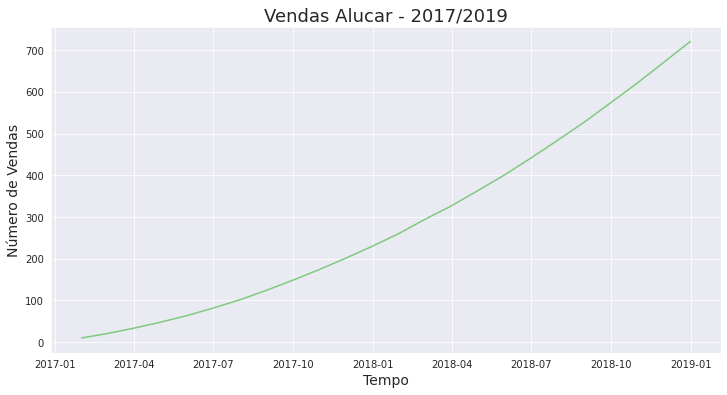

In [ ]:
plotar('Vendas Alucar - 2017/2019', 'Tempo', 'Número de Vendas', 'mes', 'vendas', alucar)

Como podemos ver, o número de vendas aumentou significativamente durante o período.

Agora, iremos avaliar o **aumento** no número de vendas. Assim, utilizaremos a função do pandas chamada diff() para criar a coluna aumento de vendas.

A função diff() calcula a diferença de um elemento do Dataframe em comparação com outro elemento no Dataframe.

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


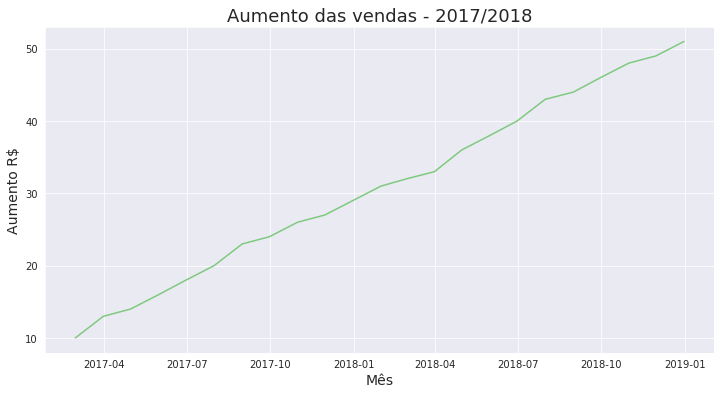

In [ ]:
plotar('Aumento das vendas - 2017/2018', 'Mês', 'Aumento R$',
       'mes', 'aumento', alucar)

Como esperado, é perceptível o aumento de vendas ao longo do período analisado.

Seguindo a análise, agora iremos avaliar a aceleração nesse número de vendas. Novamente, iremos utilizar a função diff() do pandas para criar a coluna aceleração.

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


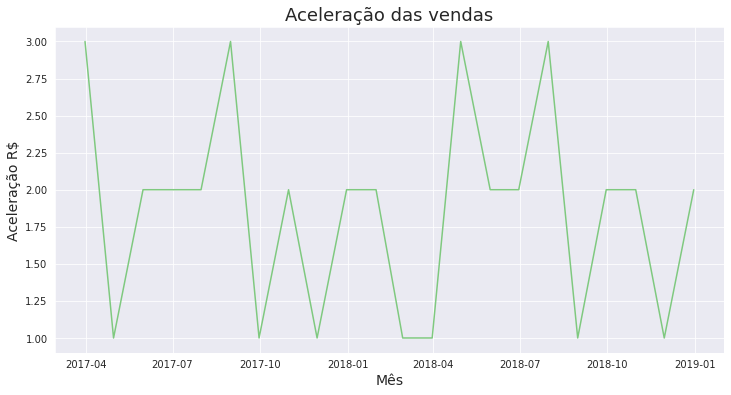

In [ ]:
plotar('Aceleração das vendas', 'Mês', 'Aceleração R$',
       'mes', 'aceleracao', alucar)

Aqui, podemos ver alguns picos de baixa e alta na aceleração do número de vendas, como por exemplo, picos de alta em 2017-04, 2017-09, 2018-05 e 2018-08, E picos de baixa em 2017-05, 2018-04, 2018-09 e 2018-12.

O que nos cabe a reflexão e a busca por respostas sobre o que ocasionou estes picos.

Agora, iremos plotar os três gráficos: número de vendas, aumento e aceleração em um único plot. Para facilitar nossos fúturos trabalhos, definiremos a função plot_comparacao, que basicamente junta os três gráficos em um único plot.

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize = (16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc = 'left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

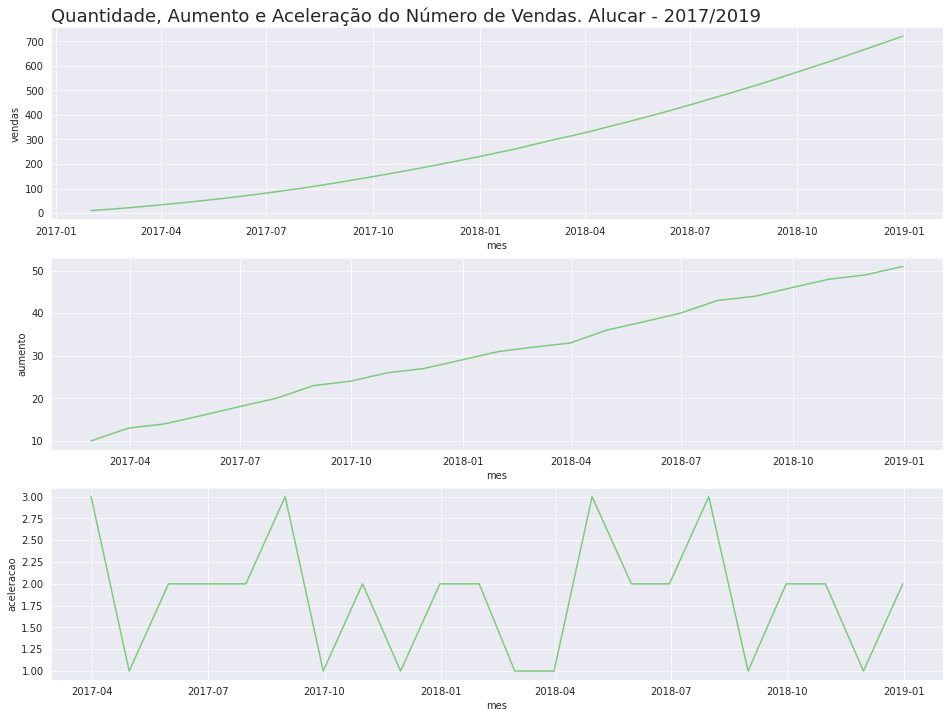

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Quantidade, Aumento e Aceleração do Número de Vendas. Alucar - 2017/2019')

## Autocorrelação

In [ ]:
from pandas.plotting import autocorrelation_plot

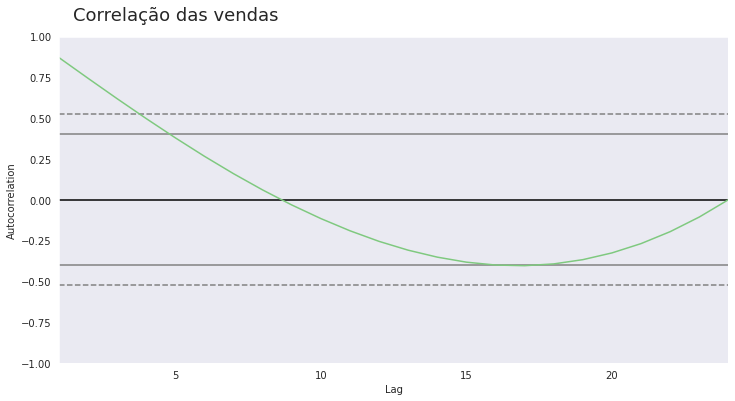

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize = 18, 
            x = 0.26, y = 0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

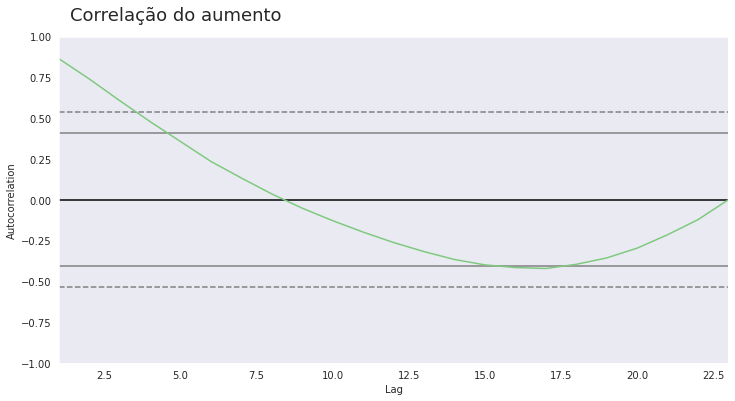

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize = 18, 
            x = 0.26, y = 0.95)
                                      #do um em diante pois é nulo
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

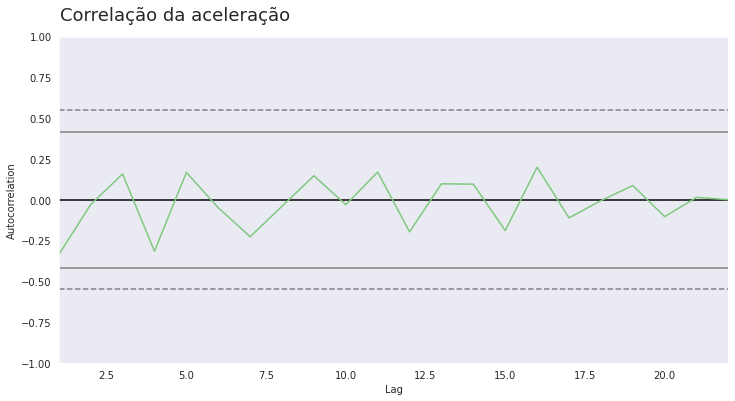

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize = 18, 
            x = 0.26, y = 0.95)
                                      #do 2 em diante pois é nulo
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# 2- Assinantes da Newsletter

Agora, daremos ínicio à uma nova análise: quantidade de assinantes da plataforma NewsLetter no período 2017-2019. Começaremos carregando a base de dados.

In [ ]:
assinantes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Portifólio/Séries Temporais/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


Como no caso anterior, a coluna mes está no formato object. Necessitando assim, de uma conversão para datetime.

In [ ]:
print(assinantes.dtypes)
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

mes           object
assinantes     int64
dtype: object


In [ ]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

Agora, iremos criar a coluna aumento e aceleração do número de assinantes. Novamente, utilizaremos a função diff() do pandas.

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


Com a função plot_comparacao, iremos plotar de uma só vez a quantidade, aumento e aceleração do número de assinantes da NewsLetter.

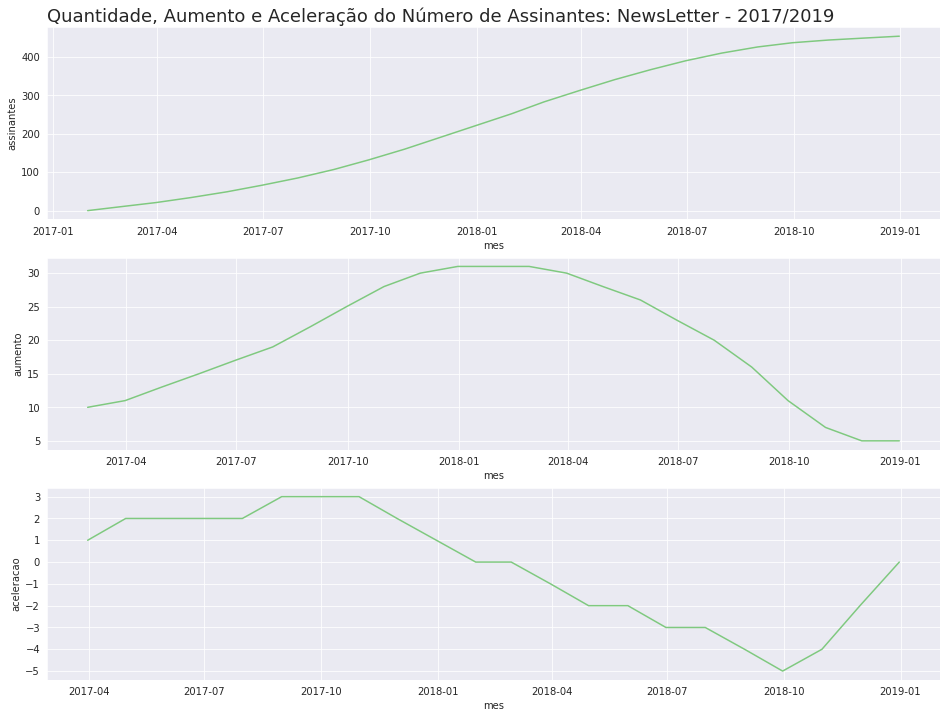

In [ ]:
plot_comparacao('mes','assinantes','aumento','aceleracao',
                assinantes, 'Quantidade, Aumento e Aceleração do Número de Assinantes: NewsLetter - 2017/2019')

Como podemos ver, houve uma queda significativa no aumento do número de assinantes a partir de 2018. Tal queda, que se análisada pelo gráfico da aceleração, teve início no mês 10 de 2017.

# Chocolura - Análisando vendas

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print(f'Quantidade de linhas e colunas: {chocolura.shape}')
print(f'Quantidade de dados nulos {chocolura.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos 0


In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


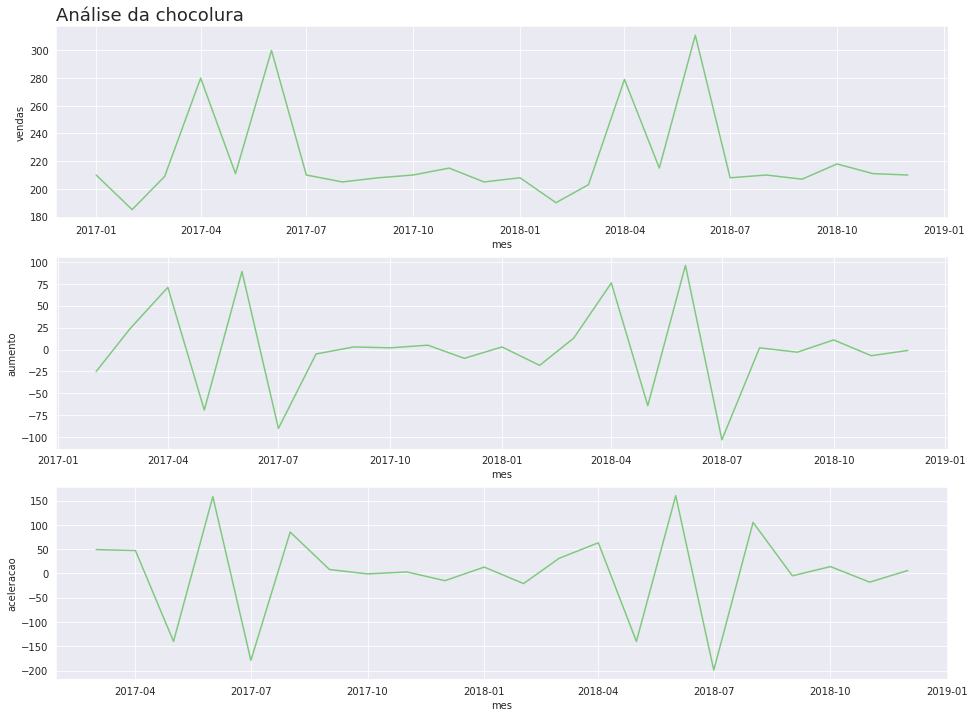

In [ ]:
plot_comparacao('mes','vendas','aumento','aceleracao',
                chocolura, 'Análise da chocolura')

# Chocolura - Vendas diárias (Outubro e Novembro)

In [ ]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print(f'Quantidade de linhas e colunas: {vendas_por_dia.shape}')
print(f'Quantidade de dados nulos {vendas_por_dia.isna().sum().sum()}')

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos 0


In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [ ]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


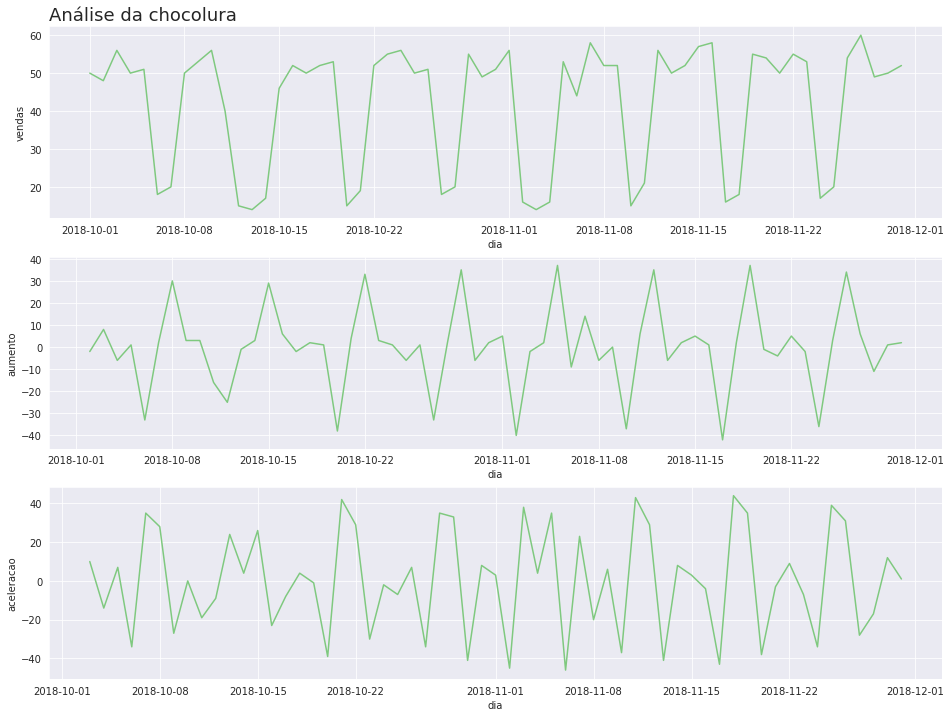

In [ ]:
plot_comparacao('dia','vendas','aumento','aceleracao',
                vendas_por_dia, 'Análise da chocolura')

## Analisando a sazonalidade

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [ ]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca',
                   'Wednesday':'Quarta', 'Thursday':'Quinta', 
                   'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

In [ ]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
vendas_agrupadas.head()

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0


# Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
quantidade_de_dias_de_fds = pd.read_csv('/content/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


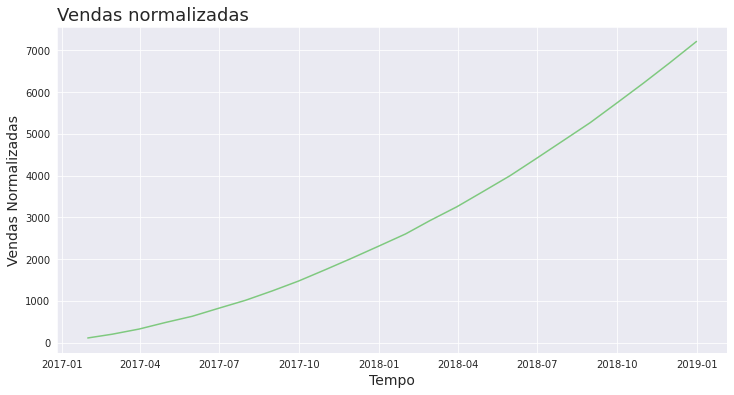

In [ ]:
plotar('Vendas normalizadas', 'Tempo', 'Vendas Normalizadas',
       'mes', 'vendas_normalizadas', cafelura)

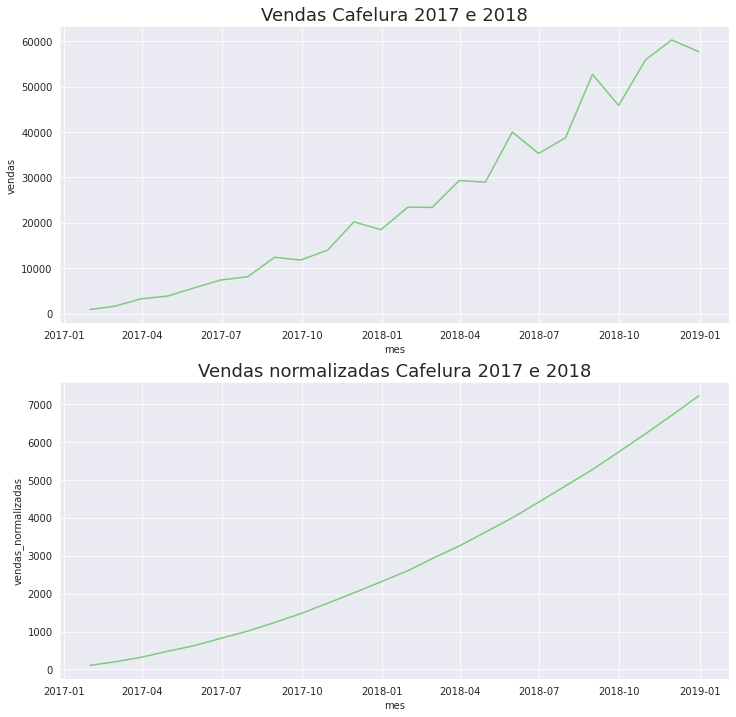

In [ ]:
plt.figure(figsize = (12,12))
ax = plt.subplot(2, 1, 1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas', data=cafelura)
ax = plt.subplot(2, 1, 2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x = 'mes', y = 'vendas_normalizadas', data=cafelura)
ax = ax

# Statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

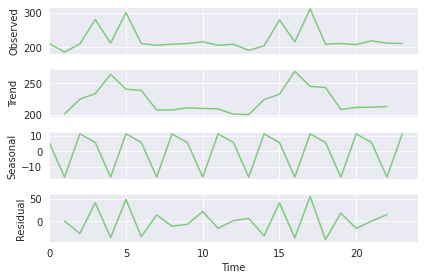

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq = 3)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


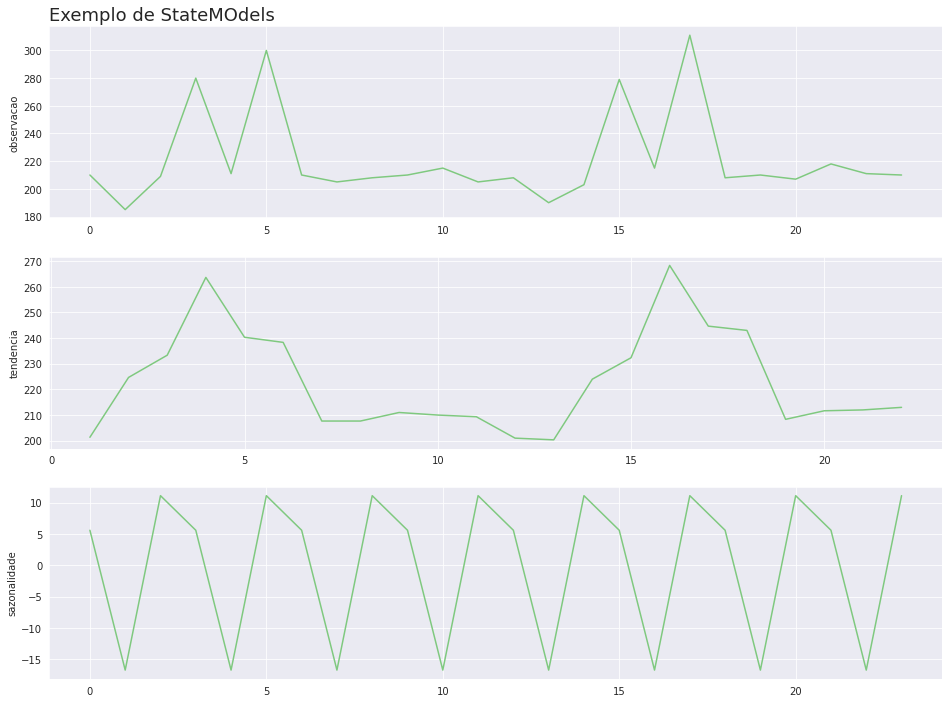

In [ ]:
plot_comparacao(resultado.index, 'observacao','tendencia','sazonalidade',
                resultado,'Exemplo de StateMOdels')

# Alucel - Análise de vendas

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])

In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


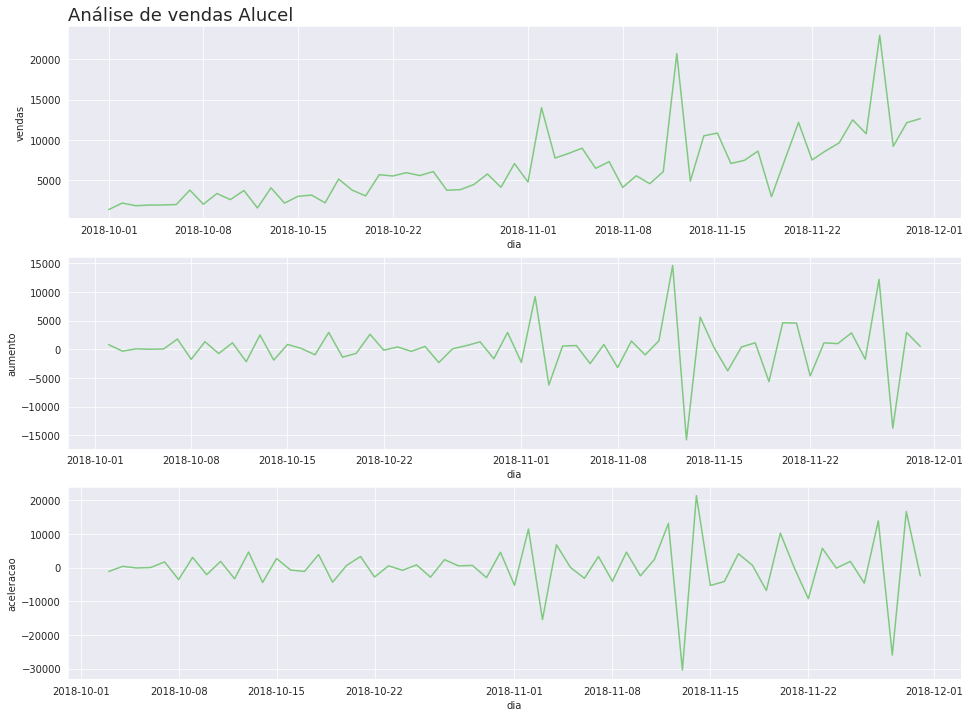

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao',
                alucel, 'Análise de vendas Alucel')

## Média Móvel

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(14)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


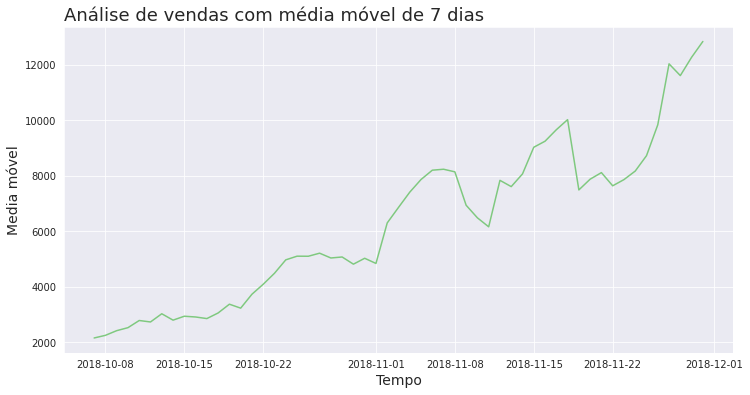

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias',
       'Tempo', 'Media móvel', 'dia', 'media_movel', alucel)

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

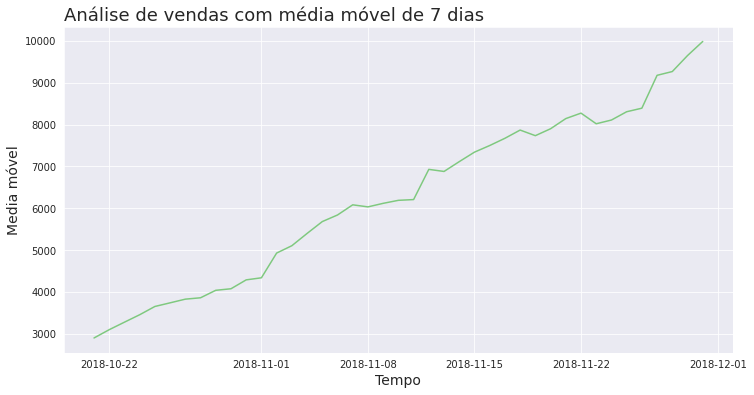

In [ ]:
plotar('Análise de vendas com média móvel de 7 dias',
       'Tempo', 'Media móvel', 'dia', 'media_movel_21', alucel)

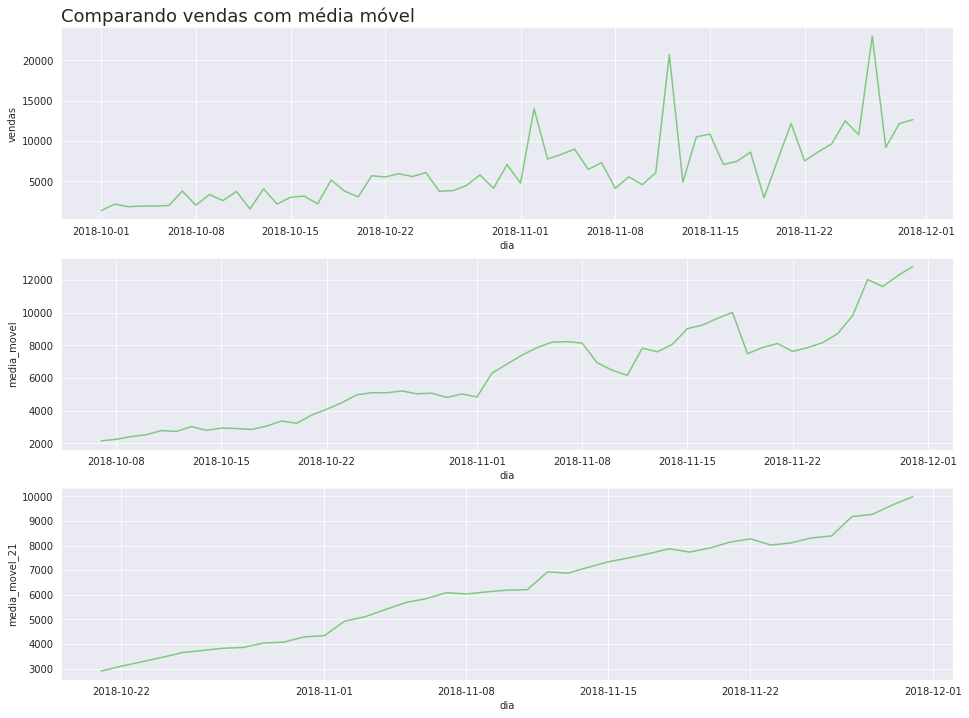

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel','media_movel_21',
                alucel, 'Comparando vendas com média móvel')

# Praticando

In [ ]:
clima = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

In [ ]:
clima.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
print(f'Quantidade de linhas e colunas: {clima.shape}')
print(f'Quantidade de dados nulos {clima.isna().sum().sum()}')

Quantidade de linhas e colunas: (1462, 5)
Quantidade de dados nulos 0


In [ ]:
clima.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [ ]:
clima['date'] = pd.to_datetime(clima['date'])
clima.dtypes

date            datetime64[ns]
meantemp               float64
humidity               float64
wind_speed             float64
meanpressure           float64
dtype: object

In [ ]:
def plotar2(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data = dataset)
  ax.figure.set_size_inches(25, 6)
  ax.set_title(titulo, loc = 'left',
              fontsize = 18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

## Temperatura Média

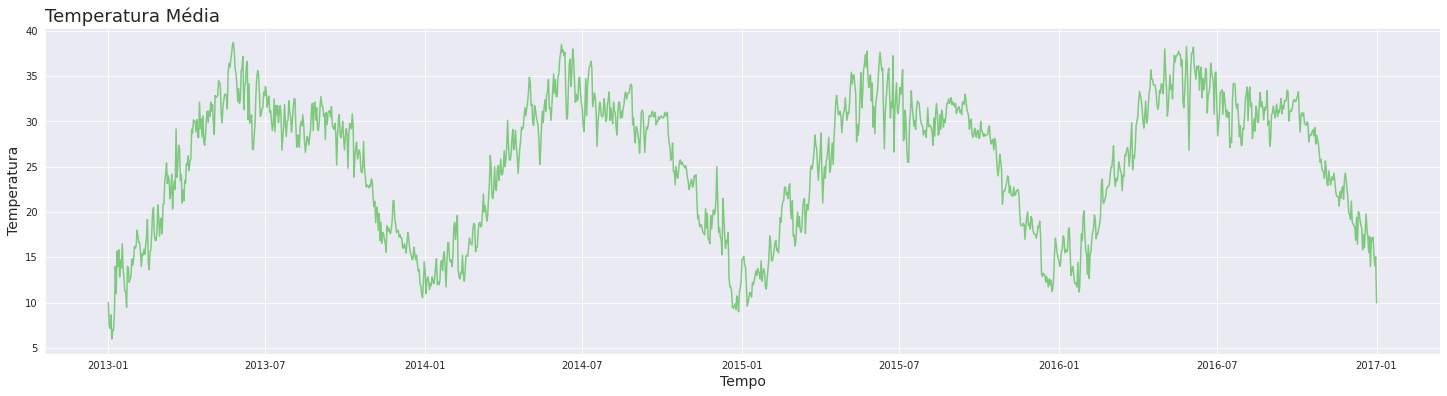

In [ ]:
plotar2('Temperatura Média',
       'Tempo', 'Temperatura', 'date', 'meantemp', clima)

In [ ]:
clima['media_movel_temp'] = clima['meantemp'].rolling(21).mean()

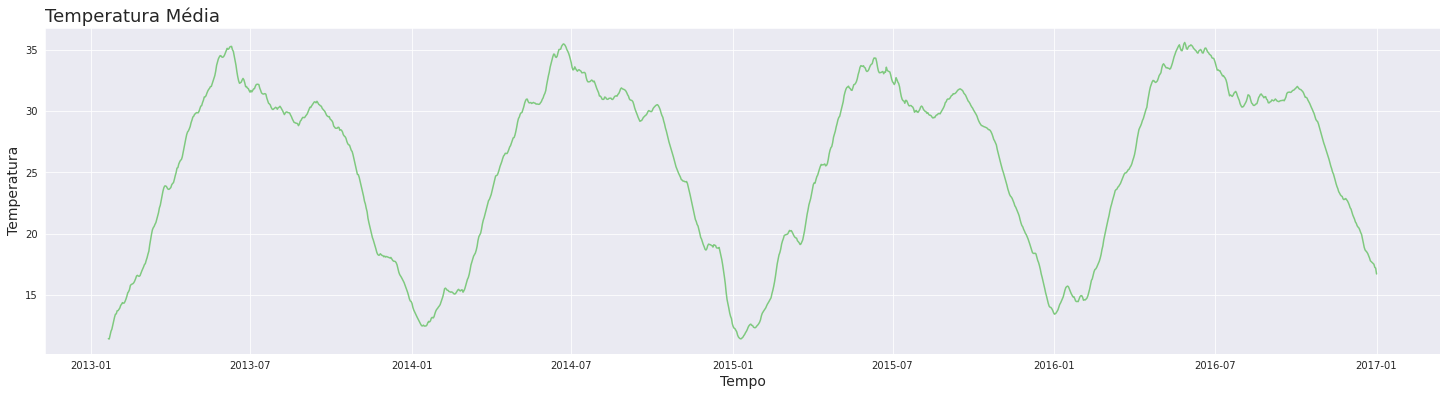

In [ ]:
plotar2('Temperatura Média',
       'Tempo', 'Temperatura', 'date', 'media_movel_temp', clima)

In [ ]:
clima['aumento_media'] = clima['media_movel_temp'].diff().rolling(21).mean()
clima.head()

,date,meantemp,humidity,wind_speed,meanpressure,aumento_media,aceleracao_media,media_movel_temp,media_movel_umidade
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,NaN,NaN
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,NaN,NaN


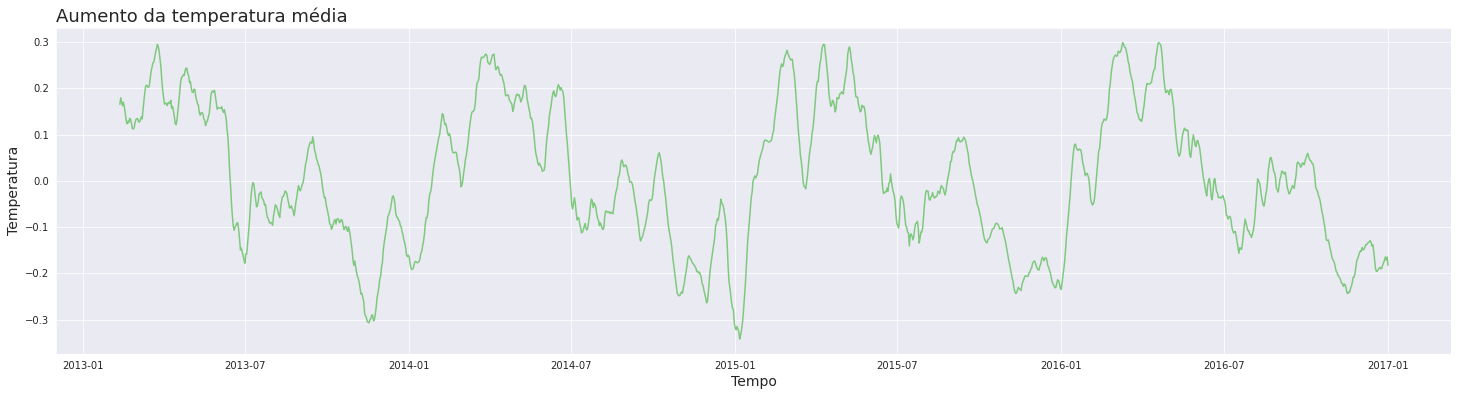

In [ ]:
plotar2('Aumento da temperatura média',
       'Tempo', 'Temperatura', 'date', 'aumento_media', clima)

## Umidade

In [ ]:
clima.head()

,date,meantemp,humidity,wind_speed,meanpressure,aumento_media,aceleracao_media,media_movel_temp
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,NaN
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,NaN


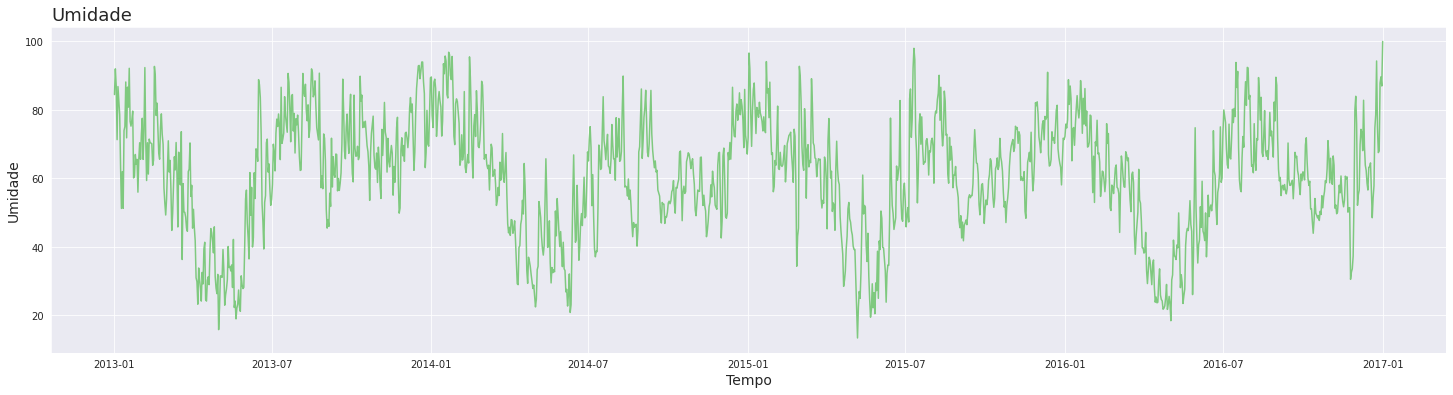

In [ ]:
plotar2('Umidade',
       'Tempo', 'Umidade', 'date', 'humidity', clima)

In [ ]:
clima['media_movel_umidade'] = clima['humidity'].rolling(21).mean()

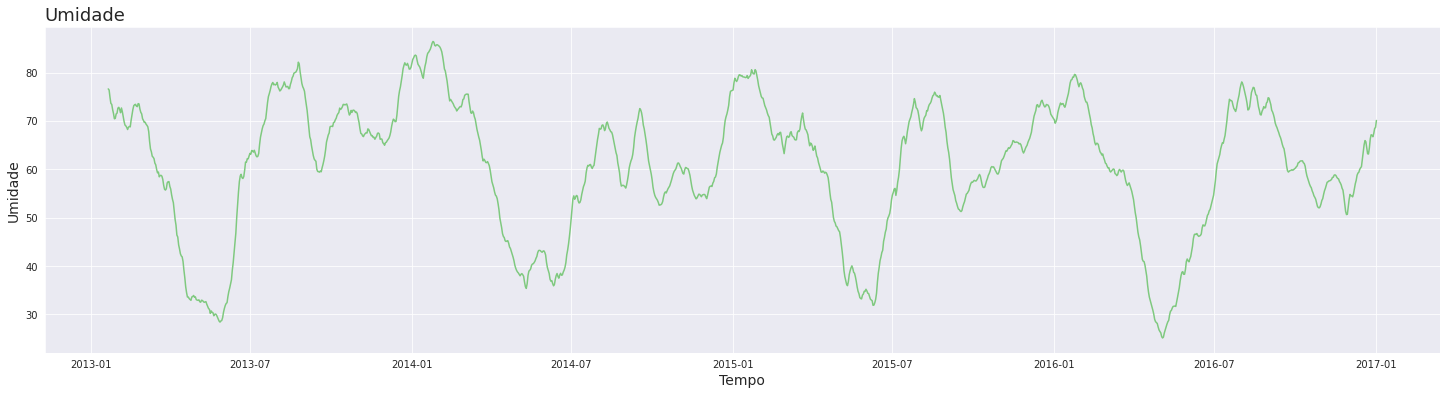

In [ ]:
plotar2('Umidade',
       'Tempo', 'Umidade', 'date', 'media_movel_umidade', clima)

## Velocidade do Vento

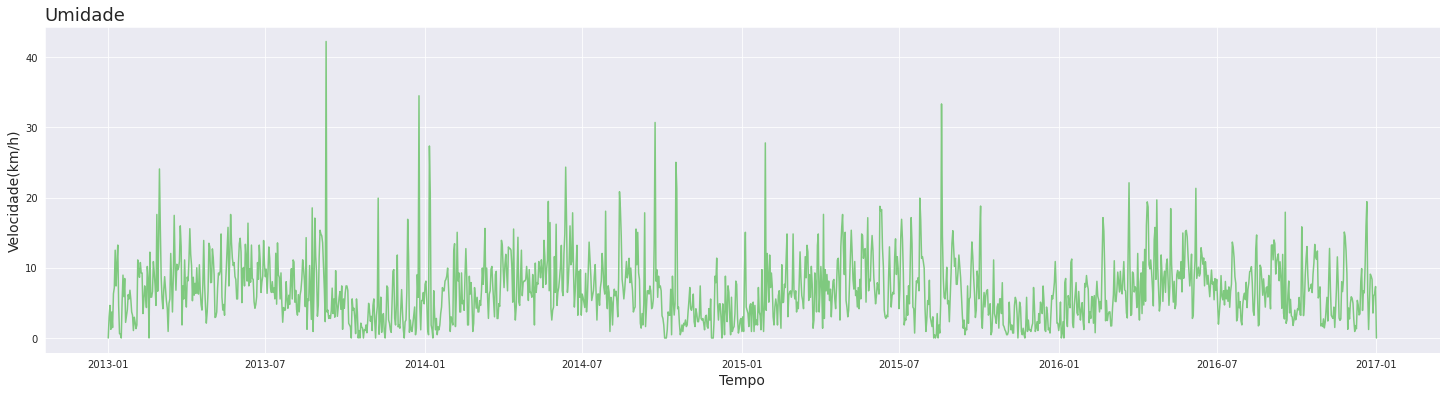

In [ ]:
plotar2('Umidade',
       'Tempo', 'Velocidade(km/h)', 'date', 'wind_speed', clima)

In [ ]:
clima['media_movel_vento'] = clima['wind_speed'].rolling(21).mean()

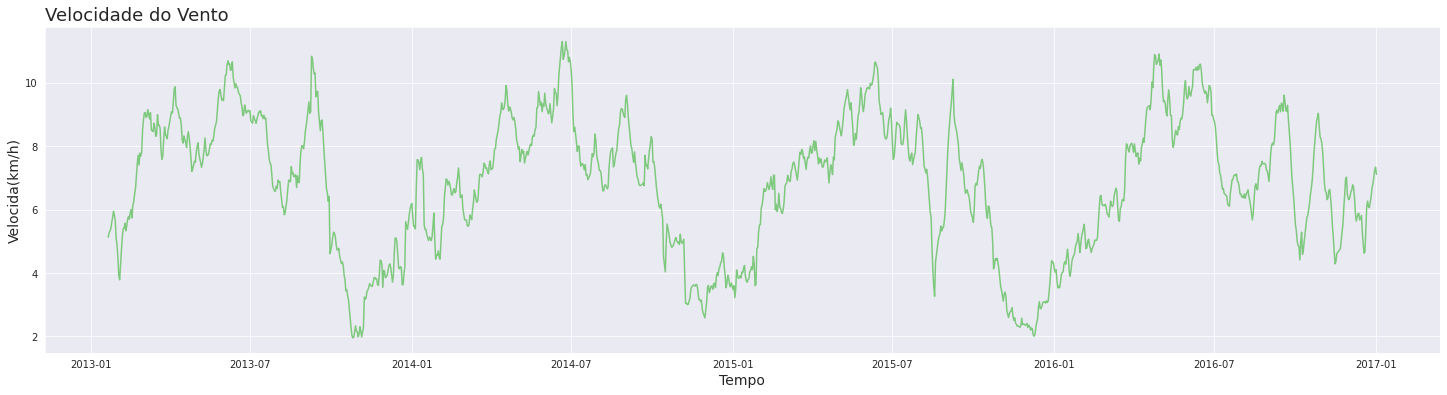

In [ ]:
plotar2('Velocidade do Vento',
       'Tempo', 'Velocida(km/h)', 'date', 'media_movel_vento', clima)

## Análise Geral / Comparacao

In [ ]:
clima.head()

,date,meantemp,humidity,wind_speed,meanpressure,aumento_media,aceleracao_media,media_movel_temp,media_movel_umidade,media_movel_vento,aceleracao_vento
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,NaN,NaN,NaN,NaN


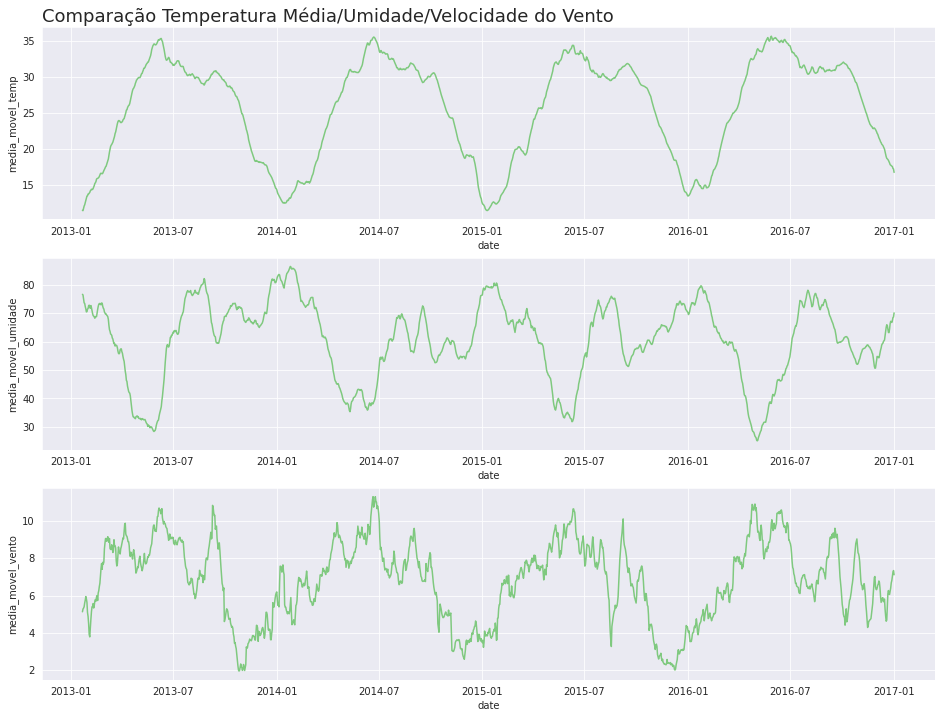

In [ ]:
plot_comparacao('date', 'media_movel_temp', 'media_movel_umidade', 'media_movel_vento',
                clima, 'Comparação Temperatura Média/Umidade/Velocidade do Vento')